In [1]:
! pip install seaborn

In [2]:
import pandas as pd
import joblib
from bs4 import BeautifulSoup
import os
import re
import numpy as np

In [3]:
DATASET_PATH = "../dataset/dataset.csv"

In [4]:
# load dataset
df = pd.read_csv(DATASET_PATH)

if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']

df.head()

,source_text,locale,language,split,privacy_mask,uid,masked_text,mbert_tokens,mbert_token_classes
0,<p>Rapport de Réclamation<br>Nom : Mtre Paljor...,FR,fr,train,"[{'label': 'SURNAME', 'start': 40, 'end': 46, ...",222952,<p>Rapport de Réclamation<br>Nom : Mtre [SURNA...,"['<', 'p', '>', 'Rapport', 'de', 'R', '##éc', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,<p>Rapport de Réclamation<br>Nom : Monsieur Lo...,FR,fr,train,"[{'label': 'SURNAME', 'start': 44, 'end': 52, ...",222955,<p>Rapport de Réclamation<br>Nom : Monsieur [S...,"['<', 'p', '>', 'Rapport', 'de', 'R', '##éc', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,<p>Rapport de Réclamation<br>Nom : Monsieur Ru...,FR,fr,train,"[{'label': 'SURNAME', 'start': 44, 'end': 48, ...",222957,<p>Rapport de Réclamation<br>Nom : Monsieur [S...,"['<', 'p', '>', 'Rapport', 'de', 'R', '##éc', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,<p>Rapport de Réclamation<br>Nom : Mairesse Br...,FR,fr,train,"[{'label': 'SURNAME', 'start': 44, 'end': 51, ...",222960,<p>Rapport de Réclamation<br>Nom : Mairesse [S...,"['<', 'p', '>', 'Rapport', 'de', 'R', '##éc', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,<p>Rapport de Réclamation<br>Nom : Mtre Moser-...,FR,fr,train,"[{'label': 'SURNAME', 'start': 40, 'end': 54, ...",222962,<p>Rapport de Réclamation<br>Nom : Mtre [SURNA...,"['<', 'p', '>', 'Rapport', 'de', 'R', '##éc', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [5]:
len(df)

261626

In [6]:
def normalize(text):
    if pd.notnull(text) == False or text.strip() == '':
        return np.nan
    text = re.sub(r'\s+', ' ', text)
    return text

# normalize spaces in the 'source_text' column
df['source_text'] = df['source_text'].apply(normalize)

df["source_text"] = df["source_text"].drop_duplicates()
df.dropna(subset=["source_text"], inplace=True)
len(df)

261555

In [7]:
# remove html tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [8]:
# remove html tags from the 'source_text' column
df['source_text'] = df['source_text'].apply(lambda text: remove_html_tags(text) if pd.notnull(text) else text)
print(df['source_text'].head())

/var/folders/pn/z89vhgwn5_l3hxsht3yldv8m0000gn/T/ipykernel_31998/3735053148.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


0    Rapport de RéclamationNom : Mtre PaljorNuméro ...
1    Rapport de RéclamationNom : Monsieur LongsterN...
2    Rapport de RéclamationNom : Monsieur RubyNumér...
3    Rapport de RéclamationNom : Mairesse BrönnerNu...
4    Rapport de RéclamationNom : Mtre Moser-Nydegge...
Name: source_text, dtype: object


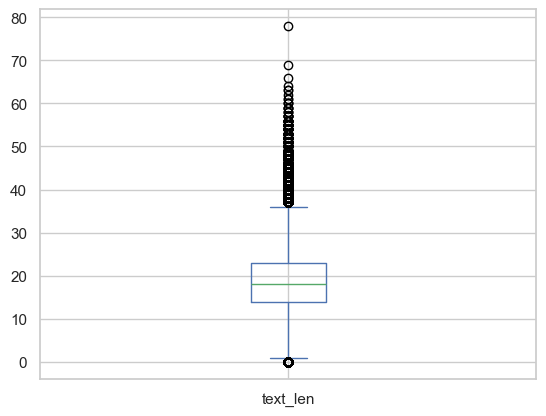

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

df["text_len"] = df["source_text"].apply(lambda x: len(x.split()))

# boxplot for tain set, label 1
df["text_len"].plot(kind="box")

plt.show()

In [10]:
df["text_len"].describe()

count    261555.000000
mean         19.306964
std           7.160342
min           0.000000
25%          14.000000
50%          18.000000
75%          23.000000
max          78.000000
Name: text_len, dtype: float64

In [11]:
# from numpy import percentile


# # calculate interquartile range
# q25, q75 = percentile(df["text_len"], 25), percentile(df["text_len"], 75)
# iqr = q75 - q25
# print("Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f" % (q25, q75, iqr))

# # outlier cutoff
# cut_off = iqr * 1.5
# lower, upper = q25 - cut_off, q75 + cut_off

# # remove outliers
# def is_outlier(val):
#     return val < lower or val > upper

# df["is_outlier"] = df['text_len'].apply(is_outlier)

# print("Num. outliers:", len(df.query("is_outlier")))
# print("Num. non-outliers:",  len(df.query("~is_outlier")))

In [12]:
df.to_csv("assets/dataset_normalized.csv", index=False)